In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal

## rt_trips_DB_2018.csv

In [2]:
df_trips = pd.read_csv("../DB/monthlyData/rt_trips_DB_2018.csv",skip_blank_lines=True,index_col=False)

### Object types and valid entries

In [3]:
print(df_trips.info(null_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182637 entries, 0 to 2182636
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   DAYOFSERVICE     2182637 non-null  object 
 1   TRIPID           2182637 non-null  int64  
 2   LINEID           2182637 non-null  object 
 3   ROUTEID          2182637 non-null  object 
 4   DIRECTION        2182637 non-null  int64  
 5   PLANNEDTIME_ARR  2182637 non-null  int64  
 6   PLANNEDTIME_DEP  2182637 non-null  int64  
 7   ACTUALTIME_ARR   2045430 non-null  float64
 8   ACTUALTIME_DEP   2018086 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 149.9+ MB
None


### Nature of data

In [4]:
df_trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0


### Unique entries

In [5]:
df_trips.nunique()

DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68122
ACTUALTIME_DEP      66771
dtype: int64

### Association
TRIPID feature for df_trips has very large cardinality (658964). Hence, to plot association, its not considered a catagorical variable.

In [6]:
df_trips['LINEID'] = df_trips[['LINEID']].astype('category')
df_trips['ROUTEID'] = df_trips[['ROUTEID']].astype('category')
df_trips['DIRECTION'] = df_trips[['DIRECTION']].astype('category')

<Figure size 864x360 with 0 Axes>

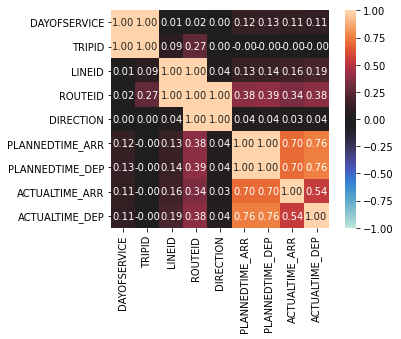

{'corr':                  DAYOFSERVICE    TRIPID    LINEID   ROUTEID  DIRECTION  \
 DAYOFSERVICE         1.000000  0.999977  0.014416  0.023105   0.000000   
 TRIPID               0.999977  1.000000  0.093571  0.266191   0.000735   
 LINEID               0.014416  0.093571  1.000000  0.999895   0.043290   
 ROUTEID              0.023105  0.266191  0.999895  1.000000   0.999866   
 DIRECTION            0.000000  0.000735  0.043290  0.999866   1.000000   
 PLANNEDTIME_ARR      0.120739 -0.002189  0.133489  0.381668   0.041135   
 PLANNEDTIME_DEP      0.128382 -0.002647  0.136771  0.386237   0.040226   
 ACTUALTIME_ARR       0.111406 -0.001931  0.162740  0.340953   0.032990   
 ACTUALTIME_DEP       0.106350 -0.002394  0.192155  0.376733   0.043165   
 
                  PLANNEDTIME_ARR  PLANNEDTIME_DEP  ACTUALTIME_ARR  \
 DAYOFSERVICE            0.120739         0.128382        0.111406   
 TRIPID                 -0.002189        -0.002647       -0.001931   
 LINEID                  0.133

In [7]:
plt.figure(figsize=(12,5))
nominal.associations(df_trips, nominal_columns=['DAYOFSERVICE','LINEID','ROUTEID','DIRECTION'])

### Features

#### Confirm that, for a SINGLE trip ID, only ONE corresponding Line ID is present

In [8]:
# uniqueness = []
# for trip_id in df_trips['TRIPID'].unique(): 
#     uniqueness.append(df_trips.loc[df_trips['TRIPID'] == trip_id]['LINEID'].nunique() == 1)
# all(uniqueness)

#### Confirm that, for a SINGLE trip ID, only ONE corresponding Route ID is present

In [9]:
# uniqueness = []
# for trip_id in df_trips['TRIPID'].unique(): 
#     uniqueness.append(df_trips.loc[df_trips['TRIPID'] == trip_id]['ROUTEID'].nunique() == 1)
# all(uniqueness)

#### Source of truth :  Trip IDs are shared across days

In [10]:
df_trips.loc[df_trips['TRIPID'] == 6262138]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
1,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,0.0
140264,15-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30016.0,0.0
222674,16-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30117.0,26382.0
562075,14-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30580.0,26578.0
1057230,08-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30475.0,26373.0
1192237,05-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30796.0,26432.0
1310647,09-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30922.0,0.0
1554930,12-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30587.0,25962.0
1578863,13-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30532.0,26422.0
1615634,06-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,31289.0,26653.0


In [11]:
df_trips.loc[(df_trips['ROUTEID'] == "25B_271" )& (df_trips['TRIPID'] == 6262138 )]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
1,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,0.0
140264,15-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30016.0,0.0
222674,16-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30117.0,26382.0
562075,14-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30580.0,26578.0
1057230,08-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30475.0,26373.0
1192237,05-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30796.0,26432.0
1310647,09-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30922.0,0.0
1554930,12-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30587.0,25962.0
1578863,13-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30532.0,26422.0
1615634,06-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,31289.0,26653.0


In [12]:
df_trips.loc[(df_trips['ROUTEID'] == "25B_271" )& (df_trips['TRIPID'] == 6262138 )].nunique()

DAYOFSERVICE       10
TRIPID              1
LINEID              1
ROUTEID             1
DIRECTION           1
PLANNEDTIME_ARR     1
PLANNEDTIME_DEP     1
ACTUALTIME_ARR     10
ACTUALTIME_DEP      8
dtype: int64

#### Route ID and Line ID have one to many realtion

In [13]:
df_trips.loc[(df_trips['LINEID'] == "25B")]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
1,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,0.0
555,26-JUN-18 00:00:00,7109011,25B,25B_274,1,71548,68520,72511.0,0.0
666,26-JUN-18 00:00:00,7101579,25B,25B_271,2,31854,28260,32627.0,0.0
1348,11-MAR-18 00:00:00,6395312,25B,25B_274,1,41258,38820,41551.0,38892.0
1349,11-MAR-18 00:00:00,6388317,25B,25B_274,1,43058,40620,43466.0,40637.0
...,...,...,...,...,...,...,...,...,...
2181903,14-MAY-18 00:00:00,6765187,25B,25B_274,1,31351,28320,31745.0,28313.0
2182119,15-MAY-18 00:00:00,6752037,25B,25B_274,1,79435,76620,79898.0,76647.0
2182374,15-MAY-18 00:00:00,6767526,25B,25B_271,2,50499,47160,51016.0,47179.0
2182442,14-MAY-18 00:00:00,6752037,25B,25B_274,1,79435,76620,79317.0,76619.0


In [14]:
df_trips.loc[(df_trips['LINEID'] == "25B")].nunique()

DAYOFSERVICE         360
TRIPID              8920
LINEID                 1
ROUTEID                3
DIRECTION              2
PLANNEDTIME_ARR     5163
PLANNEDTIME_DEP      191
ACTUALTIME_ARR     21106
ACTUALTIME_DEP     16577
dtype: int64

### LINEID and ROUTEID pair does not reflect definite relation with other features 

In [15]:
 df_trips.loc[(df_trips['LINEID'] == "25B" ) & (df_trips['ROUTEID'] == "25B_271" )]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
1,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,0.0
666,26-JUN-18 00:00:00,7101579,25B,25B_271,2,31854,28260,32627.0,0.0
1592,26-JUN-18 00:00:00,7112060,25B,25B_271,2,73311,70560,73590.0,70427.0
2158,11-APR-18 00:00:00,6619266,25B,25B_271,2,77212,74160,76721.0,74192.0
2159,11-APR-18 00:00:00,6620770,25B,25B_271,2,73612,70560,73516.0,70528.0
...,...,...,...,...,...,...,...,...,...
2181354,15-MAY-18 00:00:00,6752019,25B,25B_271,2,32843,28260,32975.0,0.0
2181460,15-MAY-18 00:00:00,6760736,25B,25B_271,2,54099,50760,54950.0,0.0
2181869,14-MAY-18 00:00:00,6758613,25B,25B_271,2,30229,26460,30069.0,0.0
2182374,15-MAY-18 00:00:00,6767526,25B,25B_271,2,50499,47160,51016.0,47179.0


In [16]:
 df_trips.loc[(df_trips['LINEID'] == "25B" ) & (df_trips['ROUTEID'] == "25B_271" )].nunique()

DAYOFSERVICE         360
TRIPID              4521
LINEID                 1
ROUTEID                1
DIRECTION              1
PLANNEDTIME_ARR     2693
PLANNEDTIME_DEP      113
ACTUALTIME_ARR     11455
ACTUALTIME_DEP     10124
dtype: int64

In [17]:
 df_trips.loc[(df_trips['LINEID'] == "25B" ) & (df_trips['ROUTEID'] == "25B_271" ) & \
              (df_trips['TRIPID'] == 6262138 )  & (df_trips['DAYOFSERVICE'] == "07-FEB-18 00:00:00" )]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
1,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,0.0


### Check if a LINEID entry is available for both inbound and outbound

In [19]:
df_trips.loc[(df_trips['DIRECTION'] == 1)].nunique()

DAYOFSERVICE          360
TRIPID             327641
LINEID                124
ROUTEID               275
DIRECTION               1
PLANNEDTIME_ARR     60445
PLANNEDTIME_DEP       626
ACTUALTIME_ARR      66634
ACTUALTIME_DEP      64507
dtype: int64

In [20]:
df_trips.loc[(df_trips['DIRECTION'] == 2)].nunique()

DAYOFSERVICE          360
TRIPID             331323
LINEID                128
ROUTEID               313
DIRECTION               1
PLANNEDTIME_ARR     60709
PLANNEDTIME_DEP       666
ACTUALTIME_ARR      66530
ACTUALTIME_DEP      65265
dtype: int64

### Varify that TRIPIDs for inbound and outbound are mutually exclusive

In [21]:
set(df_trips.loc[(df_trips['DIRECTION'] == 2)]['TRIPID'])\
.intersection(df_trips.loc[(df_trips['DIRECTION'] == 1)]['TRIPID'])

set()

## Janury_2018.csv

In [22]:
df_Jan = pd.read_csv("../DB/monthlyData/January_2018.csv",skip_blank_lines=True,index_col=False)
df_Jan.drop('VEHICLEID',axis=1,inplace=True)

### Object types and valid entries

In [23]:
df_Jan['DAYOFSERVICE'] = pd.to_datetime(df_Jan['DAYOFSERVICE'])
df_Jan['TRIPID'] = df_Jan[['TRIPID']].astype('category')
df_Jan['PROGRNUMBER'] = df_Jan[['PROGRNUMBER']].astype('category')
df_Jan['STOPPOINTID'] = df_Jan[['STOPPOINTID']].astype('category')

In [24]:
print(df_Jan.info(null_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10525004 entries, 0 to 10525003
Data columns (total 8 columns):
 #   Column           Non-Null Count     Dtype         
---  ------           --------------     -----         
 0   DAYOFSERVICE     10525004 non-null  datetime64[ns]
 1   TRIPID           10525004 non-null  int64         
 2   PROGRNUMBER      10525004 non-null  int64         
 3   STOPPOINTID      10525004 non-null  int64         
 4   PLANNEDTIME_ARR  10525004 non-null  int64         
 5   PLANNEDTIME_DEP  10525004 non-null  int64         
 6   ACTUALTIME_ARR   10525004 non-null  int64         
 7   ACTUALTIME_DEP   10525004 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 642.4 MB
None


### Nature of data

In [25]:
df_Jan.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-01-01,5958355,3,1172,23799,23799,23863,23863
1,2018-01-01,5958355,4,1173,23860,23860,23934,24072
2,2018-01-01,5958355,5,1174,23937,23937,24114,24140
3,2018-01-01,5958355,6,1175,24048,24048,24180,24192
4,2018-01-01,5958355,7,15,24130,24130,24227,24257


### Unique entries

In [26]:
df_Jan.nunique()

DAYOFSERVICE          31
TRIPID             76453
PROGRNUMBER          103
STOPPOINTID         4714
PLANNEDTIME_ARR    68859
PLANNEDTIME_DEP    68859
ACTUALTIME_ARR     71982
ACTUALTIME_DEP     71965
dtype: int64

### make csv for STOPPOINTID

In [27]:
pd.DataFrame(np.sort(df_Jan['STOPPOINTID'].unique()), columns=['STOPPOINTID']).to_csv("../DB/stopID.csv",index=False)

### Plot association

<Figure size 864x360 with 0 Axes>

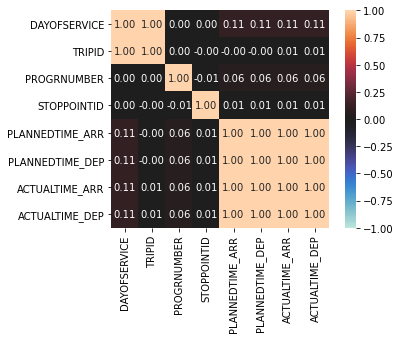

{'corr':                  DAYOFSERVICE    TRIPID  PROGRNUMBER  STOPPOINTID  \
 DAYOFSERVICE         1.000000  0.998620     0.004514     0.004293   
 TRIPID               0.998620  1.000000     0.002587    -0.001134   
 PROGRNUMBER          0.004514  0.002587     1.000000    -0.008579   
 STOPPOINTID          0.004293 -0.001134    -0.008579     1.000000   
 PLANNEDTIME_ARR      0.110182 -0.000874     0.061283     0.005891   
 PLANNEDTIME_DEP      0.110182 -0.000874     0.061283     0.005891   
 ACTUALTIME_ARR       0.110101  0.006204     0.061831     0.006089   
 ACTUALTIME_DEP       0.110063  0.006242     0.061817     0.006010   
 
                  PLANNEDTIME_ARR  PLANNEDTIME_DEP  ACTUALTIME_ARR  \
 DAYOFSERVICE            0.110182         0.110182        0.110101   
 TRIPID                 -0.000874        -0.000874        0.006204   
 PROGRNUMBER             0.061283         0.061283        0.061831   
 STOPPOINTID             0.005891         0.005891        0.006089   
 PLANNEDTI

In [28]:
plt.figure(figsize=(12,5))
nominal.associations(df_Jan, nominal_columns=['DAYOFSERVICE'])

In [29]:
df_Jan.loc[df_Jan['TRIPID'] == 5958355]

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-01-01,5958355,3,1172,23799,23799,23863,23863
1,2018-01-01,5958355,4,1173,23860,23860,23934,24072
2,2018-01-01,5958355,5,1174,23937,23937,24114,24140
3,2018-01-01,5958355,6,1175,24048,24048,24180,24192
4,2018-01-01,5958355,7,15,24130,24130,24227,24257
5,2018-01-01,5958355,8,17,24221,24221,24295,24352
6,2018-01-01,5958355,9,18,24266,24266,24389,24389
7,2018-01-01,5958355,10,19,24285,24285,24405,24417
8,2018-01-01,5958355,11,21,24329,24329,24453,24461
9,2018-01-01,5958355,12,7602,24361,24361,24487,24504


## Merge df_Jan_route with df_trips['TRIPID','LINEID'] on 'TRIPID'
* **OBJECTIVE: Obtain a unique mapping for LINEID - STOPOINTID -  PROGRNUMBER - DIRECIION**
    * To obtain a detailed route for bus, we need to know successive stoppoints taken by a bus line
    * Above mapping gives us exact route followed by bus

In [30]:
df_Jan_route_prgm = pd.merge(df_Jan[['DAYOFSERVICE','STOPPOINTID', 'TRIPID', 'PROGRNUMBER']].drop_duplicates(),\
                             df_trips[['TRIPID', 'LINEID', 'DIRECTION']],on='TRIPID', how='left').drop_duplicates()
df_Jan_route_prgm = df_Jan_route_prgm[['DAYOFSERVICE','TRIPID','STOPPOINTID','LINEID', 'DIRECTION', 'PROGRNUMBER']].drop_duplicates()

### Object types and valid entries

In [31]:
print(df_Jan_route_prgm.info(null_counts = True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10525004 entries, 0 to 41668029
Data columns (total 6 columns):
 #   Column        Non-Null Count     Dtype         
---  ------        --------------     -----         
 0   DAYOFSERVICE  10525004 non-null  datetime64[ns]
 1   TRIPID        10525004 non-null  int64         
 2   STOPPOINTID   10525004 non-null  int64         
 3   LINEID        10525004 non-null  object        
 4   DIRECTION     10525004 non-null  int64         
 5   PROGRNUMBER   10525004 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 562.1+ MB
None


### Nature of data

In [32]:
df_Jan_route_prgm.head()

,DAYOFSERVICE,TRIPID,STOPPOINTID,LINEID,DIRECTION,PROGRNUMBER
0,2018-01-01,5958355,1172,41,1,3
1,2018-01-01,5958355,1173,41,1,4
2,2018-01-01,5958355,1174,41,1,5
3,2018-01-01,5958355,1175,41,1,6
4,2018-01-01,5958355,15,41,1,7


### Unique entries

In [33]:
df_Jan_route_prgm.nunique()

DAYOFSERVICE       31
TRIPID          76453
STOPPOINTID      4714
LINEID            126
DIRECTION           2
PROGRNUMBER       103
dtype: int64

## Generate dataframe

In [34]:
# Define dataframe schema
df_Jan_STOPS_ROUTES_PRGM_Dir = pd.DataFrame()

In [35]:
# get cardinality entries directions
directions = list(df_Jan_route_prgm['DIRECTION'].unique())

for dir in directions:
    
    #Get unique entries for LINEID in a list for DIRECTION = 1
    df_dir = df_Jan_route_prgm.loc[(df_Jan_route_prgm['DIRECTION'] == dir)]
    LINES_Jan_route_prgm = list(df_dir['LINEID'].unique())

    for line in LINES_Jan_route_prgm:

        # Get dataframe consisting all entries for a LINEID
        df_line = df_dir.loc[df_dir['LINEID'] == line]
        dates = list(df_line['DAYOFSERVICE'].unique())

        # Get entries for a complete trip : using any valid TRIPID made on the LINEID on any valid DAYOFSERVICE
        # Here, 1st trip entry made on 1st day of service is used 
        Trips = list(df_line.loc[(df_line['DAYOFSERVICE'] == dates[0])]['TRIPID'].unique())

        # Ontain and append ['ROUTEID','STOPPOINTID','PRGMNUMBER'] for dates[0] and trips[0] to df_Jan_STOPS_ROUTES_PRGM
        df_stop_Route_Prgm = pd.DataFrame(df_line.loc[(df_line['DAYOFSERVICE'] == dates[0]) & (df_line['TRIPID'] == Trips[0])]\
        [['LINEID','STOPPOINTID','PROGRNUMBER','DIRECTION']].sort_values(by = ['PROGRNUMBER']))

        df_Jan_STOPS_ROUTES_PRGM_Dir = df_Jan_STOPS_ROUTES_PRGM_Dir.append(df_stop_Route_Prgm).reset_index(drop=True)


#### Object types and valid entries

In [36]:
df_Jan_STOPS_ROUTES_PRGM_Dir.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11877 entries, 0 to 11876
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LINEID       11877 non-null  object
 1   STOPPOINTID  11877 non-null  int64 
 2   PROGRNUMBER  11877 non-null  int64 
 3   DIRECTION    11877 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 371.3+ KB


#### Nature of data

In [37]:
df_Jan_STOPS_ROUTES_PRGM_Dir.head()

,LINEID,STOPPOINTID,PROGRNUMBER,DIRECTION
0,41,1172,3,1
1,41,1173,4,1
2,41,1174,5,1
3,41,1175,6,1
4,41,15,7,1


#### Unique entries

In [38]:
df_Jan_STOPS_ROUTES_PRGM_Dir.nunique()

LINEID          126
STOPPOINTID    4528
PROGRNUMBER     102
DIRECTION         2
dtype: int64

#### Save to CSV

In [39]:
# df_Jan_STOPS_ROUTES_PRGM_Dir.to_csv("../DB/stop_routes_prgm_dir.csv",index=False)

### Anomaly : Same STOPPOINTID serves both inbound and outbound directions 

In [71]:
pd.set_option('display.max_rows', 200)

In [74]:
df_line_test = df_Jan_STOPS_ROUTES_PRGM_Dir.loc[(df_Jan_STOPS_ROUTES_PRGM_Dir['LINEID'] == '70')]

In [75]:
df_Jan_route_prgm.loc[(df_Jan_route_prgm['LINEID'] == '46A')].drop_duplicates()

,DAYOFSERVICE,TRIPID,STOPPOINTID,LINEID,DIRECTION,PROGRNUMBER
1427,2018-01-01,5966718,807,46A,1,1
1428,2018-01-01,5972179,2039,46A,2,1
1474,2018-01-01,5972179,2040,46A,2,2
1485,2018-01-01,5966718,808,46A,1,2
1525,2018-01-01,5966718,809,46A,1,3
...,...,...,...,...,...,...
41663668,2018-01-31,6243267,2033,46A,1,55
41663771,2018-01-31,6243267,2034,46A,1,56
41664035,2018-01-31,6243267,2035,46A,1,57
41664219,2018-01-31,6243267,2036,46A,1,58


In [76]:
df_line_test.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1994 to 9350
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LINEID       95 non-null     object
 1   STOPPOINTID  95 non-null     int64 
 2   PROGRNUMBER  95 non-null     int64 
 3   DIRECTION    95 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.7+ KB


In [77]:
df_line_test['STOPPOINTID'].value_counts()

4769    2
4770    2
3333    2
4765    2
4766    2
4767    2
4768    2
4324    2
7167    1
7576    1
793     1
7166    1
7587    1
7586    1
7588    1
1445    1
1702    1
1703    1
313     1
3329    1
7339    1
1698    1
3351    1
1701    1
1714    1
404     1
1665    1
1666    1
3331    1
3332    1
3334    1
3335    1
3336    1
3337    1
3338    1
3339    1
3340    1
1805    1
1806    1
1807    1
1808    1
785     1
786     1
1713    1
1845    1
3330    1
1907    1
747     1
748     1
749     1
750     1
1647    1
1648    1
1649    1
1906    1
1908    1
1662    1
1696    1
1911    1
1700    1
1913    1
1914    1
3352    1
1660    1
1661    1
7453    1
4325    1
349     1
751     1
1847    1
1444    1
315     1
1909    1
1699    1
3328    1
1478    1
1479    1
753     1
329     1
7370    1
752     1
1443    1
1715    1
1905    1
1697    1
7389    1
1664    1
Name: STOPPOINTID, dtype: int64

In [84]:
df_Jan_STOPS_ROUTES_PRGM_Dir.loc[(df_Jan_STOPS_ROUTES_PRGM_Dir['LINEID'] == '70') & (df_Jan_STOPS_ROUTES_PRGM_Dir['STOPPOINTID'] == 4770)]

,LINEID,STOPPOINTID,PROGRNUMBER,DIRECTION
2025,70,4770,35,1
9311,70,4770,12,2


#### Verify anomaly

In [85]:
df_Jan.loc[df_Jan['STOPPOINTID'] == 4770]

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
8876,2018-01-01,5965319,35,4770,34903,34903,34928,34928
14066,2018-01-01,5965320,12,4770,36816,36816,36817,36817
20539,2018-01-01,5957560,12,4770,38954,38954,38894,38894
26029,2018-01-01,5957561,5,4770,40595,40595,40565,40565
32416,2018-01-01,5965321,35,4770,42414,42414,42469,42469
...,...,...,...,...,...,...,...,...
10508714,2018-01-31,6235021,12,4770,82313,82313,82266,82266
10510673,2018-01-31,6234286,35,4770,82805,82805,82933,82946
10515925,2018-01-31,6235022,5,4770,84134,84134,84085,84085
10517221,2018-01-31,6234287,12,4770,84486,84486,84478,84486


In [86]:
df_trips.loc[df_trips['TRIPID'] == 5965319]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
2084455,01-JAN-18 00:00:00,5965319,70,70_60,1,35486,32700,35448.0,0.0


In [87]:
df_trips.loc[df_trips['TRIPID'] == 5965320]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
2072807,01-JAN-18 00:00:00,5965320,70,70_67,2,39460,36300,39554.0,36328.0
